# Linear Regression Project: E-Commerce

## Goals
In this project, I will:
- Discovering E-commerce Dataset
- Implement a linear regression model to predict the `Yearly Abount Spent` based on some features
- Implement a gradient descent to imporve the prediction

## Tools
In this project, we will make use of:
- pandas, a Python library used for working with data sets
- NumPy, a popular library for scientific computing
- seaborn, a Python data visualization library based on matplotlib
- Matplotlib, a popular library for plotting data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loead the data set
data = pd.read_csv('Ecommerce Customers.csv')

In [7]:
# Print 5 records
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Above, we can see that there is 3 categorical features and 4 numerical features and 1 numerical target.
Next, we will discover the data to see some plots explaning the relations we have in the data

In [9]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Above, we can see that we have `500` entries. There is no nulls in the data

In [11]:
# information about numberical features and target
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Above, we can use this information later to see if we are on the right path.
Next, we will visualize the data and see some cool plots to understand the data well

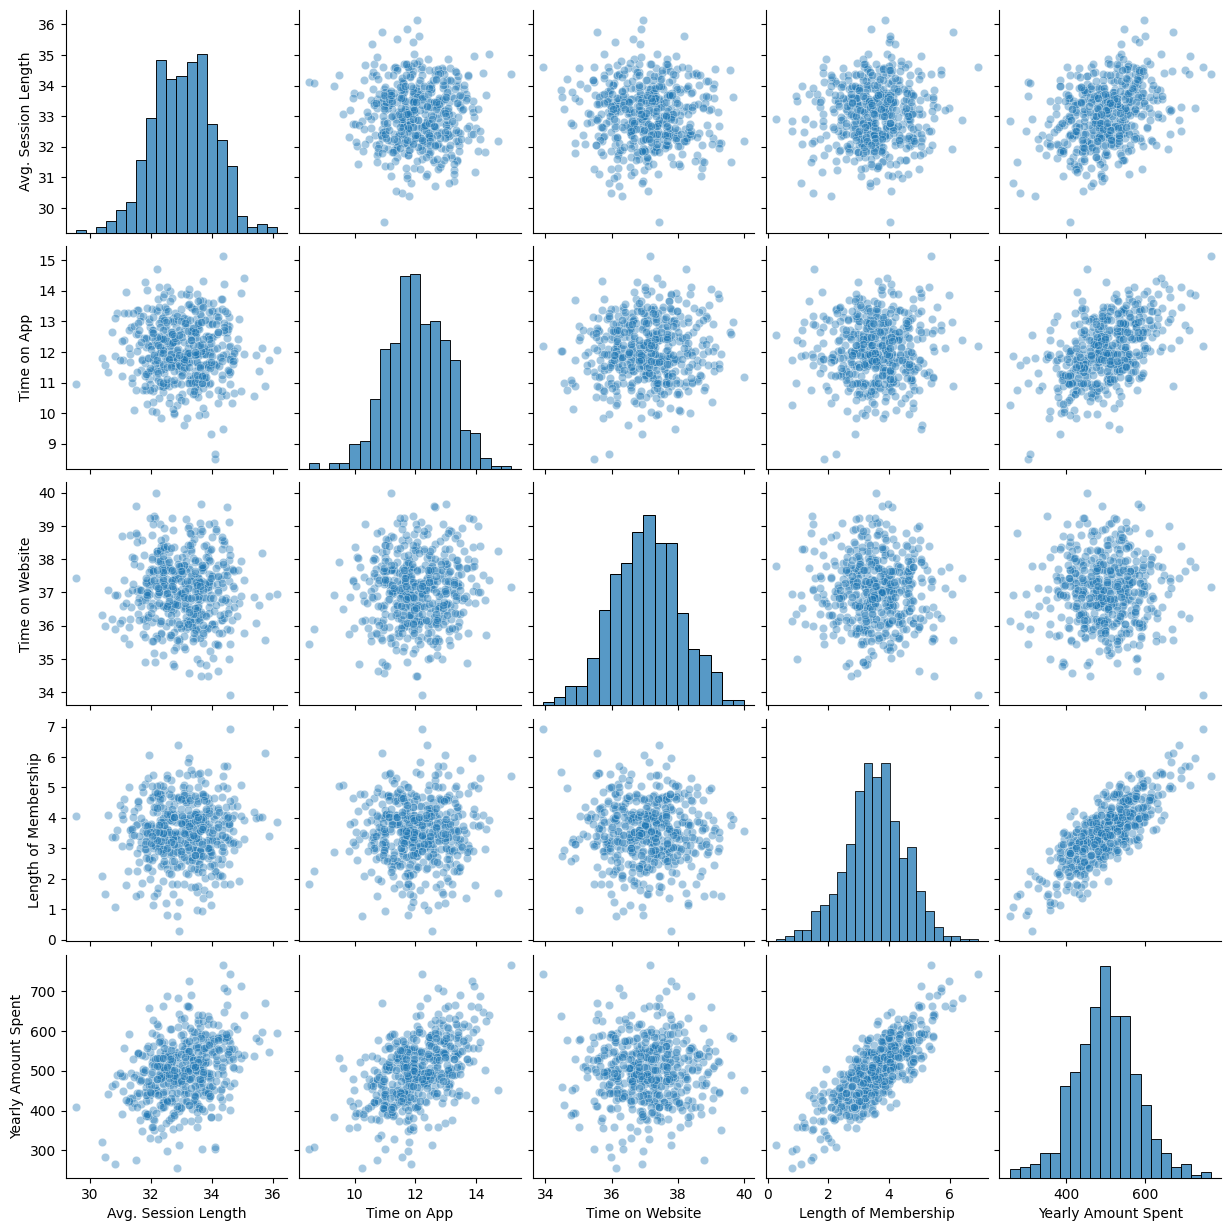

In [12]:
# draw a pair plot
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.4})

Above, is a pair plot to see the realation between each to features. we will focus on the realtion betweeen the features and the target. we can see that there is no clear coorealation except between:
- `Length of Membership` and `Yearly Amount Spent`
- `Time on App` and `Yearly Amount Spent`<br><br>
so let's focus on them

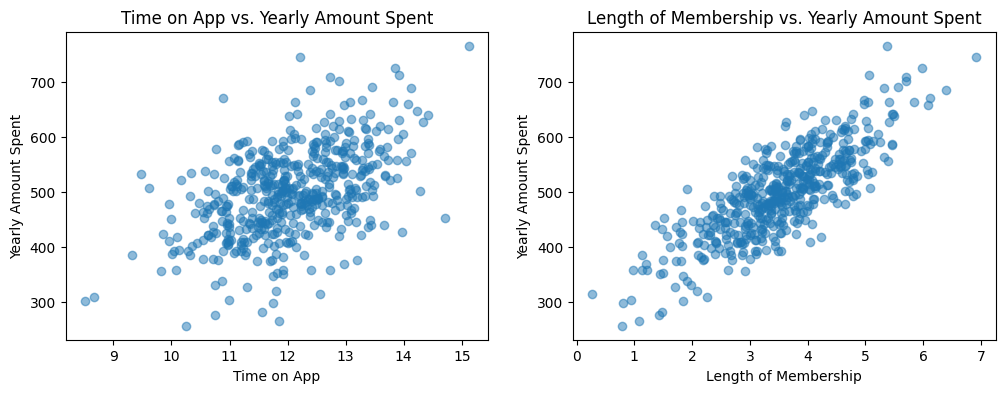

In [40]:
# Focus on Time on App and Length of Membership features
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.set_ylabel('Yearly Amount Spent')  ;  ax2.set_ylabel('Yearly Amount Spent') 
ax1.set_xlabel('Time on App')          ;  ax2.set_xlabel('Length of Membership')

ax1.scatter(x='Time on App', y='Yearly Amount Spent', data=data, alpha=0.5)
ax2.scatter(x='Length of Membership', y='Yearly Amount Spent', data=data, alpha=0.5)

ax1.set_title('Time on App vs. Yearly Amount Spent')
ax2.set_title('Length of Membership vs. Yearly Amount Spent')

plt.show()

Above the can see clearly the realations we have discussed<br>
Next, let's se a basic linear fit for each one

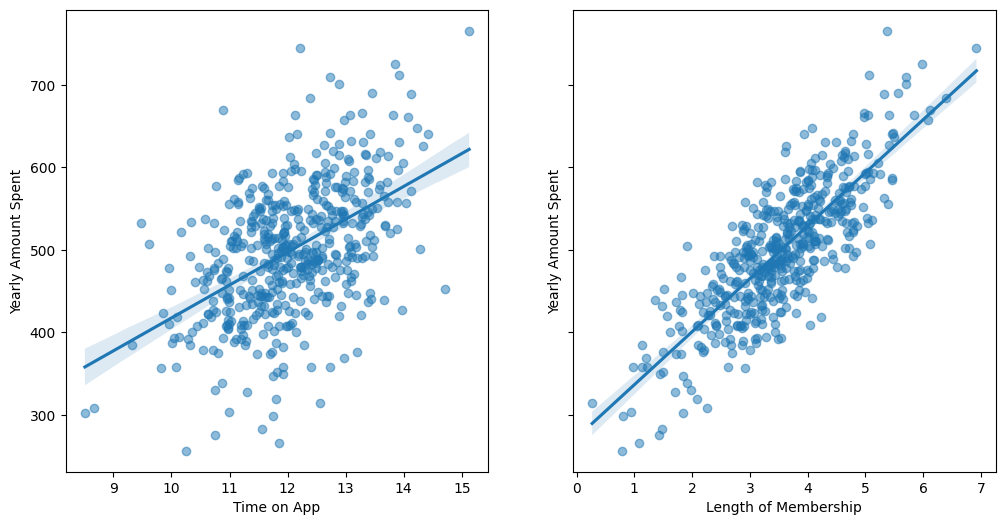

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

sns.regplot(x='Time on App',
           y='Yearly Amount Spent',
           data=data,
           scatter_kws={'alpha':0.5},
           ax=ax1)

sns.regplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=data,
           scatter_kws={'alpha':0.5},
           ax=ax2)

plt.show()

Above we can see clearly that the realation between the two features `Leangth of Membership` and `Time on App` and the target $y$ is a direct realation